<h1 align = center>Clustering (KMeans)</h1>

#### What is Clustering ?

Clustering is a technique used for grouping similar data points together. It aims to partition a set of objects into distinct groups based on their similarity. Clustering can be used for clustering a set of objects into different clusters using different clustering algorithms.

#### Where it is used ?

Clustering is useful in various fields, such as:

1. Data Analysis: Clustering can be used to identify patterns, trends, and anomalies in data. For example, clustering customer data to group similar customers can help businesses make more personalized and effective marketing strategies.

2. Machine Learning: Clustering can be used as a preprocessing step in machine learning algorithms, such as clustering algorithms like K-Means Clustering, to reduce the dimensionality of the data and improve the performance of the algorithms.

#### Algorithms Used in Clustering

Some popular clustering algorithms include:

1. K-Means Clustering: This is an iterative algorithm that partitions a set of data points into k clusters, where k is a user-defined parameter. It aims to minimize the within-cluster sum of squares (WCSS) and find the optimal cluster assignments.

2. Hierarchical Clustering: This algorithm divides the dataset into a hierarchy of clusters by merging or splitting them based on their similarity. It can be used for both hierarchical and flat clustering.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm identifies clusters of arbitrary shape by using density-based clustering. It uses a minimum distance threshold to determine the density of data points within a cluster.

#### Types of Clustering

Clustering can be divided into two main types:

1. Hierarchical Clustering: This algorithm divides the dataset into a hierarchy of clusters by merging or splitting them based on their similarity. It can be used for both hierarchical and flat clustering.

2. Partitioning Clustering: This algorithm divides the dataset into distinct clusters by assigning each data point to a specific cluster. Some popular partitioning clustering algorithms include K-Means Clustering, Mean-Shift Clustering, and Affinity Propagation Clustering.


#### Applications of Clustering

Clustering has various applications in various fields, including:

1. Market Segmentation: Clustering customers based on their purchasing behavior or demographics can help identify potential customer segments and make data-driven marketing decisions.

2. Social Network Analysis: Clustering users based on their relationships can help identify communities, influencers, and other important entities in a social network.

3. Image and Video Analysis: Clustering images or videos based on their content or features can help identify similar images or videos within a dataset.

4. Anomaly Detection: Clustering data points to identify outliers or anomalies that do not fit within the expected patterns.

5. Genomics: Clustering genetic data points to identify subpopulations or gene clusters that may be associated with specific diseases or traits.



<h2 align = center>Importing Necessary Libraries</h2>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

import seaborn as sns

<h2 align = center>Importing Dataset</h2>

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
data = pd.DataFrame(rice_cammeo_and_osmancik.data.features, columns=rice_cammeo_and_osmancik.feature_names)
y = rice_cammeo_and_osmancik.data.targets 

data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


## Data Preprocessing 

### Shape Of Data

In [32]:
X.shape

(3810, 7)

### Dataset Dtypes

In [9]:
X.dtypes

Area                   int64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area            int64
Extent               float64
dtype: object

### Checking Null Values

In [10]:
X.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

## Splitting Data into Train and Test Data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)



### Implementing Clustering(KMEAN)

In [12]:
# Define the number of clusters

sse = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)






### Plotting The Cluster Model

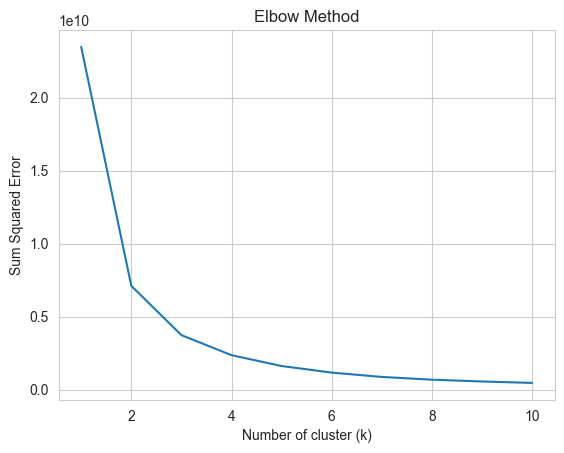

In [13]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method')
 
plt.show()

### Interpretation

As we can see in the Elbow method graph , elbow condition occuring between cluster = 3 and cluster = 4, so we are taking cluster = 3.

## Making Best KMean Model

In [34]:


km = KMeans(n_clusters=3, random_state=2)

km.fit(data)

center= km.cluster_centers_

y_pred = km.fit_predict(data)

y_pred



array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

### Combining Cluster Number with every row

In [35]:
data['cluster'] = y_pred
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,cluster
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,2
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,2
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,2
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,2


### Making 3 dataframes with different clusters

In [36]:
cluster1 = data[data.cluster == 0]
cluster2 = data[data.cluster == 1]
cluster3 = data[data.cluster == 2]


### Plotting

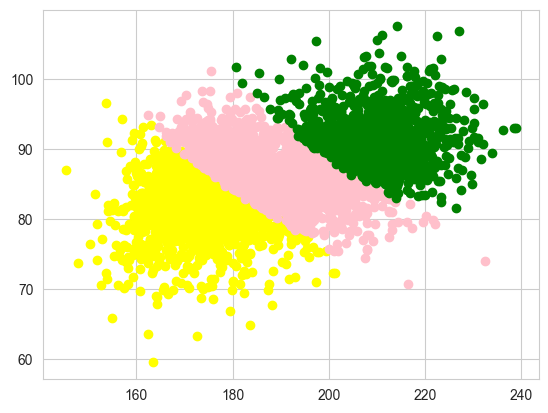

In [42]:

plt.scatter(cluster1.Major_Axis_Length, cluster1.Minor_Axis_Length, color = 'yellow')
plt.scatter(cluster2.Major_Axis_Length, cluster2.Minor_Axis_Length, color = 'pink')
plt.scatter(cluster3.Major_Axis_Length, cluster3.Minor_Axis_Length, color = 'green')


### Interpretation

This plot shows the scatter plot of Major_Axis_Length and Minor_Axis_Length with different colors representing different clusters. As we can see, the clusters are distinctly separated based on the characteristics of Major_Axis_Length and Minor_Axis_Length.




## Conclusion
 This task demonstrates the power of clustering algorithms in data analysis and can be used to identify patterns, trends, and anomalies in various fields.
system


